In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Part 1 - Getting the data and defining parameters

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)



training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/ABIDE-I dataset/UCLA_2_Prep_Data/train',
                                                 target_size = (128, 128),
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale'
                                                 )
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/ABIDE-I dataset/UCLA_2_Prep_Data/validate',
                                                 target_size = (128, 128),
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale'
                                                 )
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/ABIDE-I dataset/UCLA_2_Prep_Data/test',
                                            target_size = (128, 128),
                                            class_mode = 'binary',
                                            color_mode = 'grayscale')






Found 160 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [17]:
# Part 2 - Creating the CNN model

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# input and first convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 128)      

In [18]:
classifier.fit_generator(training_set,
                         steps_per_epoch=len(training_set),
                         epochs=10,  # Specify the number of epochs
                         validation_data=validation_set,
                         validation_steps=len(validation_set))

<ipython-input-18-13dae4e1734f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 0.7054 - accuracy: 0.4938 - val_loss: 0.6923 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 6s 1s/step - loss: 0.6940 - accuracy: 0.4812 - val_loss: 0.6956 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6957 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 7s 1s/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.4000
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6933 - val_accuracy: 0.3400
Epoch 6/10
5/5 [==============================] - 9s 2s/step - loss: 0.6930 - accuracy: 0.5375 - val_loss: 0.6945 - val_accuracy: 0.4000
Epoch 7/10
5/5 [==============================] - 6s 1s/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.4000
Epoch 8/10
5/5 [=========================

___

2/2 [==============================] - 1s 403ms/step
Test Accuracy: 56.67%


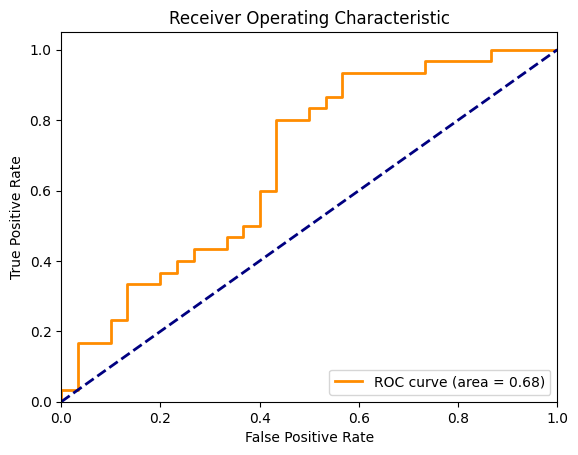

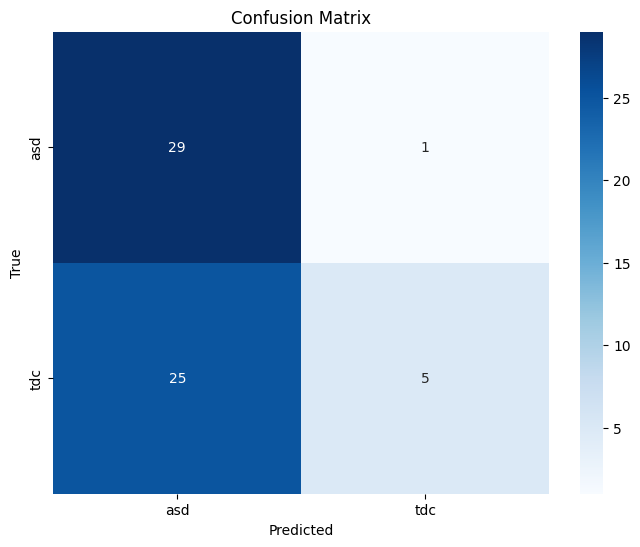

Confusion Matrix:
[[29  1]
 [25  5]]


<ipython-input-25-4c007c08d04b>:59: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_loss, validation_accuracy = classifier.evaluate_generator(validation_set, steps=len(validation_set))


Validation Accuracy: 38.00%


In [25]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your model 'classifier' trained

# Get the list of class names from the data generator
class_names = list(training_set.class_indices.keys())

# Make predictions on the test data
predictions = classifier.predict(test_set)

# 'predictions' will contain the predicted probabilities for each image
# For binary classification, you can threshold the probabilities to get class predictions (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Get the true class labels for the test data
true_classes = test_set.classes

# Calculate test accuracy
test_accuracy = accuracy_score(true_classes, predicted_classes)

# Print and return the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print and return the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print validation accuracy if you have a validation set
validation_loss, validation_accuracy = classifier.evaluate_generator(validation_set, steps=len(validation_set))
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")




In [ ]:
# # Assuming you already have your model 'classifier' trained

# # Make predictions on a single batch of test data
# predictions = classifier.predict(test_set)

# # 'predictions' will contain the predicted probabilities for each image
# # For binary classification, you can threshold the probabilities to get class predictions (0 or 1)
# predicted_classes = (predictions > 0.5)

# # Print the predicted classes for the batch
# print(predicted_classes)


import os

# Assuming you already have your model 'classifier' trained

# Get the list of class names from the data generator
class_names = list(training_set.class_indices.keys())

# Make predictions on a single batch of test data
predictions = classifier.predict(test_set)

# 'predictions' will contain the predicted probabilities for each image
# For binary classification, you can threshold the probabilities to get class predictions (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Get the list of file names in the batch
file_names = test_set.filenames

# Iterate through the predictions and file names
for i in range(len(predicted_classes)):
    file_name = os.path.basename(file_names[i])
    class_name = class_names[predicted_classes[i][0]]

    print(f"File: {file_name}, Predicted Class: {class_name}")



In [23]:
# Assuming you already have your model 'classifier' trained
validate_loss, validate_accuracy = classifier.evaluate(validation_set, steps=len(validation_set))

# Print and return the accuracy
print(f"Validate Accuracy: {validate_accuracy * 100:.2f}%")

# Calculate accuracy on the test data
test_loss, test_accuracy = classifier.evaluate(test_set, steps=len(test_set))

# Print and return the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




2/2 [==============================] - 1s 122ms/step - loss: 0.6961 - accuracy: 0.3800
Validate Accuracy: 38.00%
2/2 [==============================] - 1s 280ms/step - loss: 0.6947 - accuracy: 0.4000
Test Accuracy: 40.00%
